<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%204/2)%20Assignment%204%20-%20Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second attempt on MNIST

## Main Objective :
Achieve 99.4% accuracy on MNIST data with less than 15K parameters

## Previous Observations :

1. The model was able to learning. We were able to reach 99.21% validation accuracy with the initial model in 10 epochs. This means our architecture was working fine.

2. The model was also slightly overfitting. We need to fix that in this iteration.

3. The number of parameters were too high considering that we needed to meet the objective of 99.4% accuracy in 15 K parameters.

## Changes in this iteration :

1. Reduce number of parameters using less number of kernels.

2. Reduce number of parameters using 1x1 convolutions.

3. Introduce dropouts to reduce overfitting.

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


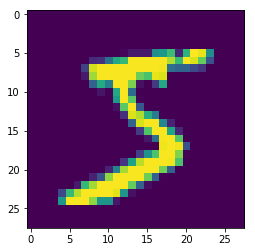

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(28,28,1), name='conv_1')) # 26
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_2')) # 24
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_3')) # 22

model.add(MaxPooling2D(pool_size=(2, 2), name='pool_1')) # 11

model.add(Conv2D(10, (3, 3), activation='relu', name='conv_4')) # 9
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_5')) # 7
model.add(Conv2D(32, (3, 3), activation='relu', name='conv_6')) # 5
model.add(Dropout(0.10))

model.add(Conv2D(10, (1, 1), activation='relu', name='conv_6a')) # 5
model.add(Conv2D(10, (3, 3), activation='relu', name='conv_7')) #3
model.add(Conv2D(10, (3, 3), name='conv_8')) # 1
model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 10)        910       
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 10)        910       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 11, 11, 10)        0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 9, 9, 10)          910       
_________________________________________________________________
conv_5 (Conv2D)      

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.3610 - acc: 0.8836 - val_loss: 0.1314 - val_acc: 0.9589
Epoch 2/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.1118 - acc: 0.9657 - val_loss: 0.0717 - val_acc: 0.9786
Epoch 3/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0823 - acc: 0.9751 - val_loss: 0.0585 - val_acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0670 - acc: 0.9803 - val_loss: 0.0468 - val_acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.0564 - acc: 0.9827 - val_loss: 0.0436 - val_acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.0502 - acc: 0.9843 - val_loss: 0.0422 - val_acc: 0.9865
Epoch 7/10
60000/60000 [==============================] - 13s 213us/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.036941937044018415, 0.9874]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[6.51398423e-14 1.35010163e-08 4.96401213e-08 1.60082024e-07
  2.81322925e-13 7.93499468e-12 6.34697442e-19 9.99999762e-01
  1.14292376e-09 4.33294955e-09]
 [1.37873722e-05 3.71760943e-05 9.99945402e-01 4.39711386e-07
  2.67569455e-09 5.47554059e-12 2.99614885e-06 3.24625993e-09
  6.81839936e-08 3.43584915e-13]
 [4.42418525e-07 9.99998689e-01 2.06463397e-08 3.00268832e-09
  1.68546933e-07 1.29755234e-11 1.50671742e-08 5.76798072e-07
  1.28475520e-07 8.44391779e-11]
 [9.99703705e-01 3.64710540e-10 8.37152402e-06 1.06373843e-08
  5.93689986e-10 1.84639779e-04 9.63783168e-05 6.20119422e-09
  3.42247631e-07 6.60091973e-06]
 [1.06305156e-11 1.72044238e-07 2.77756373e-10 8.44147408e-12
  9.99930978e-01 2.37400724e-12 3.85996879e-09 1.55461088e-10
  7.11502750e-08 6.87730935e-05]
 [1.33357133e-07 9.99997497e-01 4.09123508e-08 1.05207267e-10
  5.58291390e-07 3.94268629e-14 2.49637422e-09 1.72556452e-06
  6.49283933e-08 5.04579191e-11]
 [5.11149518e-18 5.50384755e-07 2.04584882e-09 1.01740209e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

Number of Filters :  10


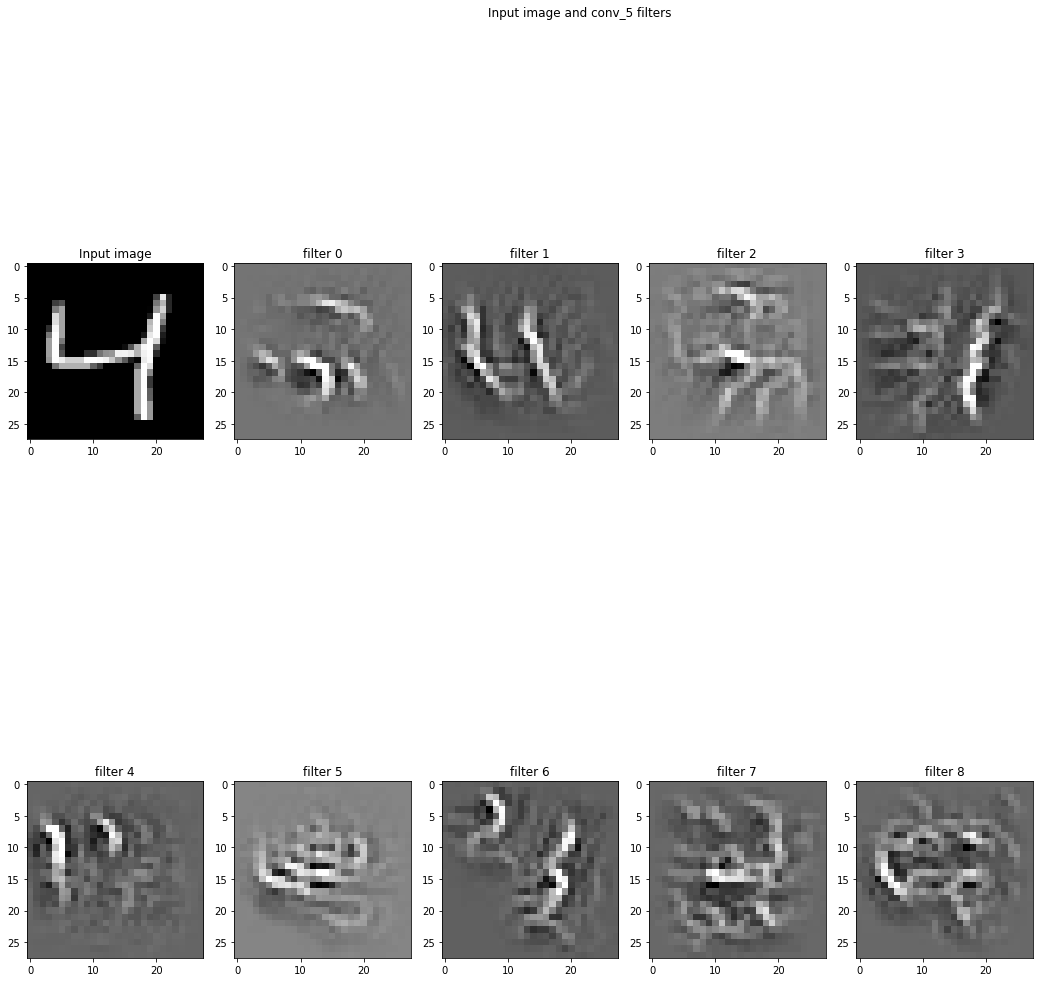

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print("Number of Filters : ",layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 8
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    elif layer_output.shape[3] >= 5:
        plot_x, plot_y = 2, 5
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (16, 16))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.0, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

# Observations :

1. The model is still able to learning even after we reduced the number of parameters.But we were only able to reach 98.84% validation accuracy in 10 epochs..

2. The model is also not overfitting. This means adding the drop out worked.

3. Using 1x1 convolutions and lesser number of filters, we were able to satisfy the constrain of less than 15 K parameters.

4. This Model is learning slowly as compared to previous model. We will have to fix this in the next iteration.